# Working with both the UK Transport Authorities Dataset and the LCWIPs dataset

In [279]:
pip install pandas geopandas requests matplotlib folium --quiet

Note: you may need to restart the kernel to use updated packages.


In [280]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as plt

In [281]:
import requests
import folium
import json

In [282]:
import matplotlib.pyplot as plt  # Importing matplotlib's pyplot
import seaborn as sns

##loading the LCWIP Json file first

In [283]:
with open('LCWIP_database_v1.json') as f: #reading the lcwip database
  lcwip_data = json.load(f)
  lcwip_df = pd.DataFrame(lcwip_data)

In [284]:
df_org = lcwip_df #saving the untouched dataset
print(lcwip_df.columns.tolist()) #checking the columns

['pdf_url', 'date_published', 'mentions_pct', 'report_name', 'other_tools_used', 'how_pct_was_used', 'other_tools_developed', 'specific_evidence_of_impact_of_using_pct', 'quotes_on_using_pct', 'local_authority_name', 'combined_authority_name', 'length_of_cycle_network_proposed', 'total_cost_of_network', 'length_of_network_km', 'total_cost_pounds', 'routes', 'specific_evidence_of_impact']


In [285]:
lcwip_pct = df_org #df just for the mentions of PCT

In [286]:
print(lcwip_pct['mentions_pct'].value_counts()) #checking the counts of reports that mention PCT
print(lcwip_pct['mentions_pct'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%') #into percentage

mentions_pct
True     90
False     4
Name: count, dtype: int64
mentions_pct
True     95.7%
False     4.3%
Name: proportion, dtype: object


In [287]:
lcwip_pct.columns

Index(['pdf_url', 'date_published', 'mentions_pct', 'report_name',
       'other_tools_used', 'how_pct_was_used', 'other_tools_developed',
       'specific_evidence_of_impact_of_using_pct', 'quotes_on_using_pct',
       'local_authority_name', 'combined_authority_name',
       'length_of_cycle_network_proposed', 'total_cost_of_network',
       'length_of_network_km', 'total_cost_pounds', 'routes',
       'specific_evidence_of_impact'],
      dtype='object')

In [288]:
lcwip_pct['local_authority_name'].value_counts()

local_authority_name
Oxfordshire County Council                                                         9
Cumbria County Council [3]                                                         5
Cumbria County Council                                                             3
Durham County Council                                                              2
Leicestershire County Council                                                      2
                                                                                  ..
Lancashire County Council & Blackpool Council (and Fylde Council, Wyre Council)    1
Adur & Worthing Councils                                                           1
Crawley Borough Council                                                            1
Horsham District Council                                                           1
Kent County Council                                                                1
Name: count, Length: 74, dtype: int64

In [289]:
lcwip_pct['report_name'].value_counts()

report_name
Ripon and Catterick Phase 1 LCWIPs                                                           2
Thirsk and Whitby Local Cycling and Walking Infrastructure Plans                             2
Cheshire West and Chester Council Local Cycling and Walking Infrastructure Plan 2020-2030    1
Liverpool City Region Local Cycling and Walking Infrastructure Plan                          1
Kendal Local Cycling and Walking Infrastructure Plan (LCWIP) 2022-2037                       1
                                                                                            ..
Portsmouth Local Cycling & Walking Infrastructure Plan Background Report                     1
Adur & Worthing Local Cycling and Walking Infrastructure Plan (LCWIP) Background Report      1
Crawley Local Cycling and Walking Infrastructure Plan (LCWIP) Report and Appendices          1
Horsham District Local Cycling and Walking Infrastructure Plan                               1
Kent Cycling and Walking Infrastructur

In [290]:
lcwip_pct['local_authority_name'].tolist()

['Liverpool City Region Combined Authority (LCRCA), in partnership with Halton, Knowsley, Liverpool, Sefton, St Helens, and Wirral councils.[1]',
 'North Yorkshire Council (for Ripon)',
 'North Yorkshire Council (for Catterick)',
 'Cheshire West and Chester Council [3]',
 'Rutland County Council',
 'Cumbria County Council, South Lakeland District Council, and Kendal Town Council [3]',
 'Warwickshire County Council [3]',
 'Dover District Council and Kent County Council [3]',
 'Cumbria County Council [3]',
 'Cumbria County Council [3]',
 'Cumbria County Council [3]',
 'Durham County Council [3]',
 'West of England Combined Authority (WECA), Bath & North East Somerset, Bristol City, South Gloucestershire, North Somerset Council [3]',
 'Royal Borough of Windsor & Maidenhead [3]',
 'Durham County Council [3]',
 'Cumbria County Council',
 'Cumbria County Council [3]',
 'Cumbria County Council [3]',
 'Staffordshire County Council [3]',
 'Derby City Council, Derbyshire County Council, Nottingh

### Loading the UK Transport Authorities boundary

In [291]:
atf_df = gpd.read_file('https://raw.githubusercontent.com/itsleeds/uktransportauthorities/main/atf_joined_2025.geojson') #loading the geojson atf

In [292]:
atf_df.head()

name  atf24_25  atf23_24   atf22_23  \
0                              Bedford  110977.0       0.0   263130.0   
1                Blackburn with Darwen  185106.0       0.0   157270.0   
2                            Blackpool   84208.0       0.0        0.0   
3  Bournemouth, Christchurch and Poole  478063.0       0.0  3780000.0   
4                     Bracknell Forest   74781.0   75000.0    30000.0   

   atf21_22   atf20_21  atfe20_21  \
0       0.0   363750.0    30250.0   
1       0.0   292600.0    77000.0   
2       0.0   312000.0    26000.0   
3  208947.0  1062100.0   312835.0   
4       0.0   181800.0    57000.0   

                                            geometry  
0  MULTIPOLYGON (((-0.47626 52.31806, -0.48714 52...  
1  MULTIPOLYGON (((-2.46581 53.78081, -2.47709 53...  
2  MULTIPOLYGON (((-3.01524 53.84277, -3.01794 53...  
3  MULTIPOLYGON (((-1.85662 50.80489, -1.8646 50....  
4  MULTIPOLYGON (((-0.76964 51.46776, -0.78256 51...

In [293]:
atf_df.count() #checking the counts to be consistent with the csv

name         73
atf24_25     71
atf23_24     71
atf22_23     71
atf21_22     71
atf20_21     71
atfe20_21    71
geometry     73
dtype: int64

In [294]:
atf_csv = pd.read_csv('https://raw.githubusercontent.com/itsleeds/uktransportauthorities/main/atf_table_aggregated.csv') #loading the csv file

In [295]:
atf_csv.head()

name  atf24_25  atf23_24  atf22_23  \
0                              Bedford    110977         0    263130   
1                Blackburn with Darwen    185106         0    157270   
2                            Blackpool     84208         0         0   
3  Bournemouth, Christchurch and Poole    478063         0   3780000   
4                     Bracknell Forest     74781     75000     30000   

   atf21_22  atf20_21  atfe20_21  \
0         0    363750      30250   
1         0    292600      77000   
2         0    312000      26000   
3    208947   1062100     312835   
4         0    181800      57000   

                                            name_atf  
0                          Bedford Unitary Authority  
1            Blackburn with Darwen Unitary Authority  
2                        Blackpool Unitary Authority  
3  Bournemouth, Christchurch & Poole Unitary Auth...  
4                 Bracknell Forest Unitary Authority

In [296]:
name1 = atf_csv['name']
name2 = atf_df['name']
if name1 is name2:
    print("The datasets are in same order.") #making sure if there are same set of names or count of entries in both datasets.

In [297]:
atf_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       75 non-null     object
 1   atf24_25   75 non-null     int64 
 2   atf23_24   75 non-null     int64 
 3   atf22_23   75 non-null     int64 
 4   atf21_22   75 non-null     int64 
 5   atf20_21   75 non-null     int64 
 6   atfe20_21  75 non-null     int64 
 7   name_atf   75 non-null     object
dtypes: int64(6), object(2)
memory usage: 4.8+ KB


In [298]:
atf_df.columns.tolist()

['name',
 'atf24_25',
 'atf23_24',
 'atf22_23',
 'atf21_22',
 'atf20_21',
 'atfe20_21',
 'geometry']

In [299]:
cols_df = ['atf24_25', 'atf23_24', 'atf22_23', 'atf21_22', 'atf20_21', 'atfe20_21']
for col in cols_df:
    num_col1 = pd.to_numeric(atf_df[col], downcast='integer', errors='coerce')
    atf_df[col] = num_col1.astype('Int64')

    num_col2 = pd.to_numeric(atf_csv[col], downcast='integer', errors='coerce')
    atf_csv[col] = num_col2.astype('Int64')

In [300]:
atf_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       73 non-null     object  
 1   atf24_25   71 non-null     Int64   
 2   atf23_24   71 non-null     Int64   
 3   atf22_23   71 non-null     Int64   
 4   atf21_22   71 non-null     Int64   
 5   atf20_21   71 non-null     Int64   
 6   atfe20_21  71 non-null     Int64   
 7   geometry   73 non-null     geometry
dtypes: Int64(6), geometry(1), object(1)
memory usage: 5.1+ KB


In [301]:
atf_csv.head()

name  atf24_25  atf23_24  atf22_23  \
0                              Bedford    110977         0    263130   
1                Blackburn with Darwen    185106         0    157270   
2                            Blackpool     84208         0         0   
3  Bournemouth, Christchurch and Poole    478063         0   3780000   
4                     Bracknell Forest     74781     75000     30000   

   atf21_22  atf20_21  atfe20_21  \
0         0    363750      30250   
1         0    292600      77000   
2         0    312000      26000   
3    208947   1062100     312835   
4         0    181800      57000   

                                            name_atf  
0                          Bedford Unitary Authority  
1            Blackburn with Darwen Unitary Authority  
2                        Blackpool Unitary Authority  
3  Bournemouth, Christchurch & Poole Unitary Auth...  
4                 Bracknell Forest Unitary Authority

In [302]:
atf_df.head()

name  atf24_25  atf23_24  atf22_23  \
0                              Bedford    110977         0    263130   
1                Blackburn with Darwen    185106         0    157270   
2                            Blackpool     84208         0         0   
3  Bournemouth, Christchurch and Poole    478063         0   3780000   
4                     Bracknell Forest     74781     75000     30000   

   atf21_22  atf20_21  atfe20_21  \
0         0    363750      30250   
1         0    292600      77000   
2         0    312000      26000   
3    208947   1062100     312835   
4         0    181800      57000   

                                            geometry  
0  MULTIPOLYGON (((-0.47626 52.31806, -0.48714 52...  
1  MULTIPOLYGON (((-2.46581 53.78081, -2.47709 53...  
2  MULTIPOLYGON (((-3.01524 53.84277, -3.01794 53...  
3  MULTIPOLYGON (((-1.85662 50.80489, -1.8646 50....  
4  MULTIPOLYGON (((-0.76964 51.46776, -0.78256 51...

In [303]:
atf_subset = atf_csv[["name","name_atf"]] #creating a subset from csv to merge into the geodataframe

In [304]:
atf_df_new = atf_df.merge(atf_subset,how='left',on='name') #merging on the name column using left instead of inner key

In [305]:
atf_df_new.head()

name  atf24_25  atf23_24  atf22_23  \
0                              Bedford    110977         0    263130   
1                Blackburn with Darwen    185106         0    157270   
2                            Blackpool     84208         0         0   
3  Bournemouth, Christchurch and Poole    478063         0   3780000   
4                     Bracknell Forest     74781     75000     30000   

   atf21_22  atf20_21  atfe20_21  \
0         0    363750      30250   
1         0    292600      77000   
2         0    312000      26000   
3    208947   1062100     312835   
4         0    181800      57000   

                                            geometry  \
0  MULTIPOLYGON (((-0.47626 52.31806, -0.48714 52...   
1  MULTIPOLYGON (((-2.46581 53.78081, -2.47709 53...   
2  MULTIPOLYGON (((-3.01524 53.84277, -3.01794 53...   
3  MULTIPOLYGON (((-1.85662 50.80489, -1.8646 50....   
4  MULTIPOLYGON (((-0.76964 51.46776, -0.78256 51...   

                                            name_atf  
0                          Bedford Unitary Authority  
1            Blackburn with Darwen Unitary Authority  
2                        Blackpool Unitary Authority  
3  Bournemouth, Christchurch & Poole Unitary Auth...  
4                 Bracknell Forest Unitary Authority

In [306]:
atf_df_new.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       73 non-null     object  
 1   atf24_25   71 non-null     Int64   
 2   atf23_24   71 non-null     Int64   
 3   atf22_23   71 non-null     Int64   
 4   atf21_22   71 non-null     Int64   
 5   atf20_21   71 non-null     Int64   
 6   atfe20_21  71 non-null     Int64   
 7   geometry   73 non-null     geometry
 8   name_atf   71 non-null     object  
dtypes: Int64(6), geometry(1), object(2)
memory usage: 5.7+ KB


<Axes: >

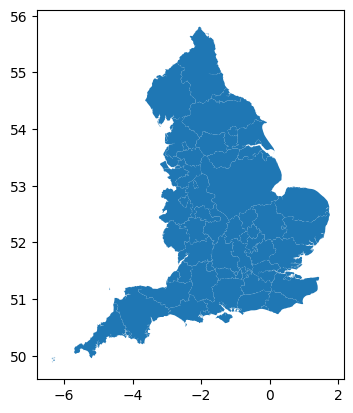

In [307]:
atf_df_new.plot()

<Axes: >

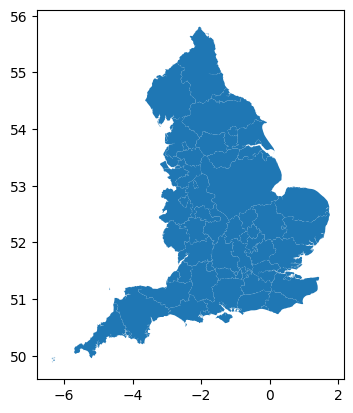

In [308]:
atf_df.plot()

### Matching the LAs between the two final dfs

In [309]:
atf_df_new.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [310]:
atf_df_new[atf_df_new['name_atf'].duplicated()]

name  atf24_25  atf23_24  atf22_23  atf21_22  atf20_21  \
37  North Lincolnshire      <NA>      <NA>      <NA>      <NA>      <NA>   

    atfe20_21                                           geometry name_atf  
37       <NA>  MULTIPOLYGON (((-0.5586 53.68949, -0.54357 53....      NaN

In [311]:
atf_names_list = atf_df_new['name'].dropna().tolist()

In [312]:
atf_names_list

['Bedford',
 'Blackburn with Darwen',
 'Blackpool',
 'Bournemouth, Christchurch and Poole',
 'Bracknell Forest',
 'Brighton and Hove',
 'Buckinghamshire',
 'Cambridgeshire and Peterborough Combined Authority',
 'Central Bedfordshire',
 'Cheshire East',
 'Cheshire West and Chester',
 'Cornwall',
 'Cumbria',
 'Devon',
 'Dorset',
 'East Midlands Combined Authority',
 'East Riding of Yorkshire',
 'East Sussex',
 'Essex',
 'Gloucestershire',
 'Greater London',
 'Greater Manchester Combined Authority',
 'Hampshire',
 'Herefordshire',
 'Hertfordshire',
 'Isle of Wight',
 'Isles of Scilly',
 'Kent',
 'Kingston upon Hull',
 'Lancashire',
 'Liverpool City Region Combined Authority',
 'Luton',
 'Medway',
 'Milton Keynes',
 'Norfolk',
 'North East Joint Transport Committee',
 'North East Lincolnshire',
 'North Lincolnshire',
 'North Northamptonshire',
 'North Somerset',
 'North Yorkshire',
 'Oxfordshire',
 'Plymouth',
 'Portsmouth',
 'Reading',
 'Shropshire',
 'Slough',
 'Somerset',
 'South Yorksh

In [313]:
ca_constituent_map = {
    'West Yorkshire Combined Authority': ['Leeds', 'Wakefield', 'Calderdale', 'Kirklees', 'Bradford'],
    'Liverpool City Region Combined Authority': ['Halton', 'Knowsley', 'Liverpool', 'Sefton', 'St Helens', 'Wirral'],
    'Greater Manchester Combined Authority': ['Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale', 'Salford', 'Stockport', 'Tameside', 'Trafford', 'Wigan'],
    'West of England Combined Authority': ['Bath & North East Somerset', 'Bristol', 'South Gloucestershire'],
    'North East Joint Transport Committee': ['Durham', 'Gateshead', 'South Tyneside', 'Sunderland', 'Northumberland', 'Newcastle upon Tyne', 'North Tyneside'],
    'South Yorkshire Combined Authority': ['Barnsley', 'Doncaster', 'Rotherham', 'Sheffield'],
    'Tees Valley Combined Authority': ['Darlington', 'Hartlepool', 'Middlesbrough', 'Redcar and Cleveland', 'Stockton-on-Tees'],
    'Cambridgeshire and Peterborough Combined Authority': ['Cambridge', 'Peterborough'],
    'West Midlands ITA': ['Birmingham', 'Coventry', 'Dudley', 'Sandwell', 'Solihull', 'Walsall', 'Wolverhampton'],
    'East Midlands Combined Authority': ['Derby', 'Derbyshire', 'Nottingham', 'Nottinghamshire','Leicester','Leicestershire','Lincolnshire','Nottingham','Nottinghamshire','Rutland'],
    'Royal Borough of Windsor and Maidenhead Unitary Authority':['The Royal Borough of Windsor & Maidenhead (RBWM)','Windsor and Maidenhead','Royal Borough of Windsor & Maidenhead'],
    'Brighton & Hove Unitary Authority':['Brighton and Hove','Brighton & Hove City Council'],
    'Isles of Scilly':['Council of the ISLES OF SCILLY'],
    'Hampshire':['Hart District Council','Hampshire County Council'],
    'Cumbria':["Cumbria County Council","South Lakeland District Council", "Kendal Town Council","Cumbria County Council, South Lakeland District Council, and Kendal Town Council [3]"]
}

In [314]:
def find_authority_match(lcwip_name, atf_list, ca_map):
    """
    Matches an LCWIP authority name to an ATF authority name.

    1. Checks for a direct match with a Combined Authority name.
    2. If no direct match, checks if any constituent council name is present.
    3. If still no match, checks for a direct match with other local authorities.
    """
    if not isinstance(lcwip_name, str):
        return None

    # Priority 1: Check for a direct match with a Combined Authority from the map keys
    for ca_name in ca_map.keys():
        if ca_name in lcwip_name:
            return ca_name

    # Priority 2: Check for constituent councils from the map values
    for ca_name, councils in ca_map.items():
        for council in councils:
            if council in lcwip_name:
                return ca_name # Return the parent Combined Authority name

    # Priority 3: Check for a direct match with any other name in the ATF list
    # Sort by length to match "North Yorkshire" before "York"
    for atf_name in sorted(atf_list, key=len, reverse=True):
        if atf_name in lcwip_name:
            return atf_name

    return None

In [315]:
#Apply the function to your DataFrame
lcwip_pct['matched_authority_name'] = lcwip_pct['local_authority_name'].apply(
    lambda x: find_authority_match(x, atf_names_list, ca_constituent_map)
)

#Display the results to verify
print("Matching complete. Here are the unique matches found:")
print(
    lcwip_pct[['local_authority_name', 'matched_authority_name']]
    .dropna()
    .drop_duplicates()
    .sort_values('matched_authority_name')
)

Matching complete. Here are the unique matches found:
                                 local_authority_name  \
71  BCP Council (Bournemouth, Christchurch and Poole)   
20                       Bracknell Forest Council [3]   
56                       Brighton & Hove City Council   
66                            Buckinghamshire Council   
84                      Cambridgeshire County Council   
..                                                ...   
49  Kirklees Council / West Yorkshire Combined Aut...   
47  Calderdale Council / West Yorkshire Combined A...   
43  Leeds City Council / West Yorkshire Combined A...   
12  West of England Combined Authority (WECA), Bat...   
45                               City of York Council   

                               matched_authority_name  
71                Bournemouth, Christchurch and Poole  
20                                   Bracknell Forest  
56                  Brighton & Hove Unitary Authority  
66                                   

In [316]:
lcwip_pct[['local_authority_name', 'matched_authority_name']]

local_authority_name  \
0   Liverpool City Region Combined Authority (LCRC...   
1                 North Yorkshire Council (for Ripon)   
2             North Yorkshire Council (for Catterick)   
3               Cheshire West and Chester Council [3]   
4                              Rutland County Council   
..                                                ...   
89                            Portsmouth City Council   
90                           Adur & Worthing Councils   
91                            Crawley Borough Council   
92                           Horsham District Council   
93                                Kent County Council   

                      matched_authority_name  
0   Liverpool City Region Combined Authority  
1                            North Yorkshire  
2                            North Yorkshire  
3                  Cheshire West and Chester  
4           East Midlands Combined Authority  
..                                       ...  
89                                Portsmouth  
90                                      None  
91                                      None  
92                                      None  
93                                      Kent  

[94 rows x 2 columns]

In [317]:
lcwip_pct['matched_authority_name']

0     Liverpool City Region Combined Authority
1                              North Yorkshire
2                              North Yorkshire
3                    Cheshire West and Chester
4             East Midlands Combined Authority
                        ...                   
89                                  Portsmouth
90                                        None
91                                        None
92                                        None
93                                        Kent
Name: matched_authority_name, Length: 94, dtype: object

In [318]:
lcwip_pct[lcwip_pct['matched_authority_name'].isna()]['local_authority_name']

25                     Mid Sussex District Council
37                         Ipswich Borough Council
38                 Tunbridge Wells Borough Council
39                     Chichester District Council
40                   Three Rivers District Council
53    Department for Transport (National Guidance)
54                          Blaby District Council
60                               Hull City Council
70                       St.Helens Borough Council
73                                Broads Authority
90                        Adur & Worthing Councils
91                         Crawley Borough Council
92                        Horsham District Council
Name: local_authority_name, dtype: object

In [319]:
lcwip_pct.columns

Index(['pdf_url', 'date_published', 'mentions_pct', 'report_name',
       'other_tools_used', 'how_pct_was_used', 'other_tools_developed',
       'specific_evidence_of_impact_of_using_pct', 'quotes_on_using_pct',
       'local_authority_name', 'combined_authority_name',
       'length_of_cycle_network_proposed', 'total_cost_of_network',
       'length_of_network_km', 'total_cost_pounds', 'routes',
       'specific_evidence_of_impact', 'matched_authority_name'],
      dtype='object')

In [320]:
lcwip_pct.head()

pdf_url   date_published  \
0  https://api.liverpoolcityregion-ca.gov.uk/wp-c...   September 2023   
1  https://edemocracy.northyorks.gov.uk/documents...  24 January 2025   
2  https://edemocracy.northyorks.gov.uk/documents...  24 January 2025   
3  https://www.cheshirewestandchester.gov.uk/asse...             2020   
4  https://www.rutland.gov.uk/sites/default/files...      August 2023   

   mentions_pct                                        report_name  \
0          True  Liverpool City Region Local Cycling and Walkin...   
1          True                 Ripon and Catterick Phase 1 LCWIPs   
2          True                 Ripon and Catterick Phase 1 LCWIPs   
3          True  Cheshire West and Chester Council Local Cyclin...   
4          True  Rutland County Council Local Cycling and Walki...   

  other_tools_used                                   how_pct_was_used  \
0             None  The PCT was used to identify existing patterns...   
1             None  The Propensity to Cycle Tool (PCT) was used to...   
2             None  The Propensity to Cycle Tool (PCT) was used to...   
3             None  The tool was used during the network planning ...   
4             None  The Propensity to Cycle Tool (PCT) was used to...   

                               other_tools_developed  \
0  A specific 'Walking Audit Methodology for Live...   
1                                               None   
2                                               None   
3                                               None   
4                                               None   

            specific_evidence_of_impact_of_using_pct quotes_on_using_pct  \
0  The PCT analysis was used to provide evidence ...                None   
1  The PCT outputs provided evidence to support t...                None   
2  The PCT outputs provided evidence to support t...                None   
3  The analysis from the Propensity to Cycle Tool...                None   
4  The PCT analysis identified a clear 'spoke' pa...                None   

                                local_authority_name  \
0  Liverpool City Region Combined Authority (LCRC...   
1                North Yorkshire Council (for Ripon)   
2            North Yorkshire Council (for Catterick)   
3              Cheshire West and Chester Council [3]   
4                             Rutland County Council   

                       combined_authority_name  \
0     Liverpool City Region Combined Authority   
1  York and North Yorkshire Combined Authority   
2  York and North Yorkshire Combined Authority   
3                                         None   
4                                         None   

                    length_of_cycle_network_proposed  \
0  Up to 600km of cycling and walking routes are ...   
1  A total network length is not specified. The p...   
2  A total network length is not specified. The p...   
3                          Not specified in document   
4                          Not specified in document   

                               total_cost_of_network  length_of_network_km  \
0  The total cost for the 10-year proposals is ex...                 600.0   
1  A total network cost is not provided. The plan...                   NaN   
2  A total network cost is not provided. The plan...                   NaN   
3                          Not specified in document                   NaN   
4                                        £35,582,560                   NaN   

   total_cost_pounds  routes specific_evidence_of_impact  \
0        250000000.0     NaN                         NaN   
1                NaN     NaN                         NaN   
2                NaN     NaN                         NaN   
3                NaN     NaN                         NaN   
4         35582560.0     NaN                         NaN   

                     matched_authority_name  
0  Liverpool City Region Combined Authority  
1                           North Yorkshire  
2        

In [321]:
lcwip_pct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   pdf_url                                   94 non-null     object 
 1   date_published                            94 non-null     object 
 2   mentions_pct                              94 non-null     bool   
 3   report_name                               94 non-null     object 
 4   other_tools_used                          69 non-null     object 
 5   how_pct_was_used                          92 non-null     object 
 6   other_tools_developed                     30 non-null     object 
 7   specific_evidence_of_impact_of_using_pct  38 non-null     object 
 8   quotes_on_using_pct                       70 non-null     object 
 9   local_authority_name                      94 non-null     object 
 10  combined_authority_name                 

In [322]:
# Perform the aggregation
lcwip_summary = lcwip_pct.groupby('matched_authority_name').agg(
    lcwip_report_count=('report_name', 'size'),
    pct_mentions=('mentions_pct', 'sum'),
    total_funding_gbp=('total_cost_pounds', 'sum'),
    total_length_km=('length_of_network_km', 'sum')
).reset_index() # reset_index turns the grouped output back into a DataFrame

# Calculate the PCT usage percentage
lcwip_summary['pct_usage_percentage'] = (lcwip_summary['pct_mentions'] / lcwip_summary['lcwip_report_count'] * 100).round(1)

print("LCWIP data has been aggregated by authority:")
print(lcwip_summary.head())

LCWIP data has been aggregated by authority:
                              matched_authority_name  lcwip_report_count  \
0                Bournemouth, Christchurch and Poole                   1   
1                                   Bracknell Forest                   1   
2                  Brighton & Hove Unitary Authority                   1   
3                                    Buckinghamshire                   1   
4  Cambridgeshire and Peterborough Combined Autho...                   2   

   pct_mentions  total_funding_gbp  total_length_km  pct_usage_percentage  
0             1                0.0              0.0                 100.0  
1             1         82317186.0              0.0                 100.0  
2             1                0.0              0.0                 100.0  
3             1                0.0              0.0                 100.0  
4             2        112000000.0              0.0                 100.0  


In [323]:
lcwip_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   matched_authority_name  35 non-null     object 
 1   lcwip_report_count      35 non-null     int64  
 2   pct_mentions            35 non-null     int64  
 3   total_funding_gbp       35 non-null     float64
 4   total_length_km         35 non-null     float64
 5   pct_usage_percentage    35 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.8+ KB


In [324]:
#merge on the 'name_atf' column from the geojson and the 'matched_authority' from our summary.
atf_spatial_analysis_df = atf_df_new.merge(
    lcwip_summary,
    left_on='name',
    right_on='matched_authority_name',
    how='left'
)

#Clean up the final DataFrame
# The merge will create a duplicate 'matched_authority' column, so we'll drop it.
atf_spatial_analysis_df.drop('matched_authority_name', axis=1, inplace=True)

atf_lcwip_corr = atf_spatial_analysis_df

# Replace NaN values in the numeric columns with 0 for cleaner mapping and analysis.
cols_to_fill = ['lcwip_report_count', 'pct_mentions', 'total_funding_gbp', 'total_length_km', 'pct_usage_percentage']
for col in cols_to_fill:
    atf_spatial_analysis_df[col] = atf_spatial_analysis_df[col].fillna(0)


print("\nMerge complete. Your GeoDataFrame now contains the aggregated LCWIP analysis.")
# Display the new columns for a few authorities to verify the merge
print(atf_spatial_analysis_df[['name_atf', 'lcwip_report_count', 'pct_usage_percentage', 'total_funding_gbp']].head())


Merge complete. Your GeoDataFrame now contains the aggregated LCWIP analysis.
                                            name_atf  lcwip_report_count  \
0                          Bedford Unitary Authority                 0.0   
1            Blackburn with Darwen Unitary Authority                 0.0   
2                        Blackpool Unitary Authority                 0.0   
3  Bournemouth, Christchurch & Poole Unitary Auth...                 1.0   
4                 Bracknell Forest Unitary Authority                 1.0   

   pct_usage_percentage  total_funding_gbp  
0                   0.0                0.0  
1                   0.0                0.0  
2                   0.0                0.0  
3                 100.0                0.0  
4                 100.0         82317186.0  


In [325]:
atf_spatial_analysis_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   name                  73 non-null     object  
 1   atf24_25              71 non-null     Int64   
 2   atf23_24              71 non-null     Int64   
 3   atf22_23              71 non-null     Int64   
 4   atf21_22              71 non-null     Int64   
 5   atf20_21              71 non-null     Int64   
 6   atfe20_21             71 non-null     Int64   
 7   geometry              73 non-null     geometry
 8   name_atf              71 non-null     object  
 9   lcwip_report_count    73 non-null     float64 
 10  pct_mentions          73 non-null     float64 
 11  total_funding_gbp     73 non-null     float64 
 12  total_length_km       73 non-null     float64 
 13  pct_usage_percentage  73 non-null     float64 
dtypes: Int64(6), float64(5), geometry(1), object(2)
memo

In [326]:
atf_spatial_analysis_df['atf_total_20_24'] = atf_spatial_analysis_df['atf24_25'] + atf_spatial_analysis_df['atf23_24'] + atf_spatial_analysis_df['atf22_23'] + atf_spatial_analysis_df['atf21_22'] + atf_spatial_analysis_df['atf20_21']

In [327]:
atf_spatial_analysis_df.head()

name  atf24_25  atf23_24  atf22_23  \
0                              Bedford    110977         0    263130   
1                Blackburn with Darwen    185106         0    157270   
2                            Blackpool     84208         0         0   
3  Bournemouth, Christchurch and Poole    478063         0   3780000   
4                     Bracknell Forest     74781     75000     30000   

   atf21_22  atf20_21  atfe20_21  \
0         0    363750      30250   
1         0    292600      77000   
2         0    312000      26000   
3    208947   1062100     312835   
4         0    181800      57000   

                                            geometry  \
0  MULTIPOLYGON (((-0.47626 52.31806, -0.48714 52...   
1  MULTIPOLYGON (((-2.46581 53.78081, -2.47709 53...   
2  MULTIPOLYGON (((-3.01524 53.84277, -3.01794 53...   
3  MULTIPOLYGON (((-1.85662 50.80489, -1.8646 50....   
4  MULTIPOLYGON (((-0.76964 51.46776, -0.78256 51...   

                                            name_atf  lcwip_report_count  \
0                          Bedford Unitary Authority                 0.0   
1            Blackburn with Darwen Unitary Authority                 0.0   
2                        Blackpool Unitary Authority                 0.0   
3  Bournemouth, Christchurch & Poole Unitary Auth...                 1.0   
4                 Bracknell Forest Unitary Authority                 1.0   

   pct_mentions  total_funding_gbp  total_length_km  pct_usage_percentage  \
0           0.0                0.0              0.0                   0.0   
1           0.0                0.0              0.0                   0.0   
2           0.0                0.0              0.0                   0.0   
3           1.0                0.0              0.0                 100.0   
4           1.0         82317186.0              0.0                 100.0   

   atf_total_20_24  
0           737857  
1           634976  
2           396208  
3          5529110  
4           361581

In [328]:
import folium

In [329]:
# Clean up data types for the popup
atf_spatial_analysis_df['lcwip_report_count'] = atf_spatial_analysis_df['lcwip_report_count'].astype(int)
atf_spatial_analysis_df['pct_mentions'] = atf_spatial_analysis_df['pct_mentions'].astype(int)
atf_spatial_analysis_df['atf24_25'] = pd.to_numeric(atf_spatial_analysis_df['atf24_25'], errors='coerce').fillna(0).astype(int)


#Creating the Interactive Map
m = folium.Map(location=[52.9, -1.5], zoom_start=6, tiles='CartoDB positron')

# Define a custom threshold scale for coloring
threshold_scale = [0, 1, 2, 4, 6, 8, 11]

folium.Choropleth(
    geo_data=atf_spatial_analysis_df,
    name='LCWIP Report Count',
    data=atf_spatial_analysis_df,
    columns=['name', 'lcwip_report_count'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.4,
    legend_name='Number of LCWIP Reports in Database',
    threshold_scale=threshold_scale,
    nan_fill_color="white"
).add_to(m)

#Add the Custom Popups
# Define the specific fields and aliases you want to display
popup_fields = ['name', 'lcwip_report_count', 'pct_mentions', 'total_funding_gbp', 'atf24_25']
aliases = [
    'Authority:',
    'LCWIP Report Count:',
    'Reports Mentioning PCT:',
    'Total LCWIP Funding:',
    'ATF 24/25 Allocation:'
]

# Add a GeoJson layer with the custom popups
popup = folium.features.GeoJsonPopup(fields=popup_fields, aliases=aliases, localize=True, labels=True)
folium.GeoJson(
    atf_spatial_analysis_df,
    name="Authority Details",
    style_function=lambda x: {'color': 'black', 'weight': 0.5, 'fillOpacity': 0.1},
    tooltip=folium.features.GeoJsonTooltip(fields=['name']),
    popup=popup
).add_to(m)

folium.LayerControl().add_to(m)

#Display the Map
m

In [330]:
# Clean up data types for the popup
atf_spatial_analysis_df['lcwip_report_count'] = atf_spatial_analysis_df['lcwip_report_count'].astype(int)
atf_spatial_analysis_df['pct_mentions'] = atf_spatial_analysis_df['pct_mentions'].astype(int)
atf_spatial_analysis_df['atf24_25'] = pd.to_numeric(atf_spatial_analysis_df['atf24_25'], errors='coerce').fillna(0).astype(int)


#Creating the Interactive Map
m = folium.Map(location=[52.9, -1.5], zoom_start=6, tiles='CartoDB positron')

# Define a custom threshold scale for coloring
threshold_scale = [0, 1e+06, 2e+06, 3e+06, 4e+06, 5e+06, 6e+06]

folium.Choropleth(
    geo_data=atf_spatial_analysis_df,
    name='No. of LCWIPS and ATF Allocations 2024-2025',
    data=atf_spatial_analysis_df,
    columns=['name', 'atf24_25'],
    key_on='feature.properties.name',
    fill_color='viridis',
    fill_opacity=0.9,
    line_opacity=0.4,
    legend_name='ATF (2024-2025) Allocations',
    threshold_scale=threshold_scale,
    nan_fill_color="white"
).add_to(m)

#Add the Custom Popups
# Define the specific fields and aliases you want to display
popup_fields = ['name', 'lcwip_report_count', 'pct_mentions', 'total_funding_gbp', 'atf24_25']
aliases = [
    'Authority:',
    'LCWIP Report Count:',
    'Reports Mentioning PCT:',
    'Total LCWIP Funding:',
    'ATF 24/25 Allocation:'
]

# Add a GeoJson layer with the custom popups
popup = folium.features.GeoJsonPopup(fields=popup_fields, aliases=aliases, localize=True, labels=True)
folium.GeoJson(
    atf_spatial_analysis_df,
    name="Authority Details",
    style_function=lambda x: {'color': 'black', 'weight': 0.5, 'fillOpacity': 0.1},
    tooltip=folium.features.GeoJsonTooltip(fields=['name']),
    popup=popup
).add_to(m)

folium.LayerControl().add_to(m)

#Display the Map
m

In [331]:
atf_spatial_analysis_df

name  atf24_25  atf23_24  atf22_23  \
0                               Bedford    110977         0    263130   
1                 Blackburn with Darwen    185106         0    157270   
2                             Blackpool     84208         0         0   
3   Bournemouth, Christchurch and Poole    478063         0   3780000   
4                      Bracknell Forest     74781     75000     30000   
..                                  ...       ...       ...       ...   
68                            Wiltshire    306720    100000    978000   
69               Windsor and Maidenhead     91955         0    262100   
70                            Wokingham    212882         0    606215   
71                       Worcestershire    361405    748899         0   
72                                 York    120482         0   1103095   

    atf21_22  atf20_21  atfe20_21  \
0          0    363750      30250   
1          0    292600      77000   
2          0    312000      26000   
3     208947   1062100     312835   
4          0    181800      57000   
..       ...       ...        ...   
68         0    681000     227000   
69         0    335400     140000   
70   2950000    576650      76000   
71         0    649200     135500   
72    350000    658350     193287   

                                             geometry  \
0   MULTIPOLYGON (((-0.47626 52.31806, -0.48714 52...   
1   MULTIPOLYGON (((-2.46581 53.78081, -2.47709 53...   
2   MULTIPOLYGON (((-3.01524 53.84277, -3.01794 53...   
3   MULTIPOLYGON (((-1.85662 50.80489, -1.8646 50....   
4   MULTIPOLYGON (((-0.76964 51.46776, -0.78256 51...   
..                                                ...   
68  MULTIPOLYGON (((-1.79168 51.66313, -1.78862 51...   
69  MULTIPOLYGON (((-0.71691 51.57719, -0.72786 51...   
70  MULTIPOLYGON (((-0.82406 51.51248, -0.83619 51...   
71  MULTIPOLYGON (((-2.42634 52.36583, -2.45765 52...   
72  MULTIPOLYGON (((-1.05873 54.04785, -1.06217 54...   

                                             name_atf  lcwip_report_count  \
0                           Bedford Unitary Authority                   0   
1             Blackburn with Darwen Unitary Authority                   0   
2                         Blackpool Unitary Authority                   0   
3   Bournemouth, Christchurch & Poole Unitary Auth...                   1   
4                  Bracknell Forest Unitary Authority                   1   
..                                                ...                 ...   
68                        Wiltshire Unitary Authority                   0   
69  Royal Borough of Windsor and Maidenhead Unitar...                   0   
70                        Wokingham Unitary Authority                   0   
71                    Worcestershire County Authority                   0   
72                     City of York Unitary Authority                   1   

    pct_mentions  total_funding_gbp  total_length_km  pct_usage_percentage  \
0              0                0.0              0.0                   0.0   
1              0                0.0              0.0                   0.0   
2              0                0.0              0.0                   0.0   
3              1                0.0              0.0                 100.0   
4              1         82317186.0              0.0                 100.0   
..           ...                ...              ...                   ...   
68             0                0.0              0.0                   0.0   
69             0                0.0              0.0                   0.0   
70             0                0.0              0.0                   0.0   
71             0                0.0              0.0                   0.0   
72             1        100000000.0              0.0                 100.0   

    atf_total_20_24  
0            737857  
1            634976  
2            396208  
3           5529110  
4            361581  
..              ...  
68          

In [332]:
atf_spatial_analysis_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   name                  73 non-null     object  
 1   atf24_25              73 non-null     int64   
 2   atf23_24              71 non-null     Int64   
 3   atf22_23              71 non-null     Int64   
 4   atf21_22              71 non-null     Int64   
 5   atf20_21              71 non-null     Int64   
 6   atfe20_21             71 non-null     Int64   
 7   geometry              73 non-null     geometry
 8   name_atf              71 non-null     object  
 9   lcwip_report_count    73 non-null     int64   
 10  pct_mentions          73 non-null     int64   
 11  total_funding_gbp     73 non-null     float64 
 12  total_length_km       73 non-null     float64 
 13  pct_usage_percentage  73 non-null     float64 
 14  atf_total_20_24       71 non-null     Int64   
dtype

In [333]:
# Replace 0 with NaN in the specific columns
atf_spatial_analysis_df['total_funding_gbp'] = atf_spatial_analysis_df['total_funding_gbp'].replace(0, np.nan)
atf_spatial_analysis_df['total_length_km'] = atf_spatial_analysis_df['total_length_km'].replace(0, np.nan)


In [334]:
atf_spatial_analysis_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   name                  73 non-null     object  
 1   atf24_25              73 non-null     int64   
 2   atf23_24              71 non-null     Int64   
 3   atf22_23              71 non-null     Int64   
 4   atf21_22              71 non-null     Int64   
 5   atf20_21              71 non-null     Int64   
 6   atfe20_21             71 non-null     Int64   
 7   geometry              73 non-null     geometry
 8   name_atf              71 non-null     object  
 9   lcwip_report_count    73 non-null     int64   
 10  pct_mentions          73 non-null     int64   
 11  total_funding_gbp     17 non-null     float64 
 12  total_length_km       8 non-null      float64 
 13  pct_usage_percentage  73 non-null     float64 
 14  atf_total_20_24       71 non-null     Int64   
dtype

In [335]:
#atf_spatial_analysis_df = atf_spatial_analysis_df.dropna()

## Finding relationship between ATF funding & Total funding data collected

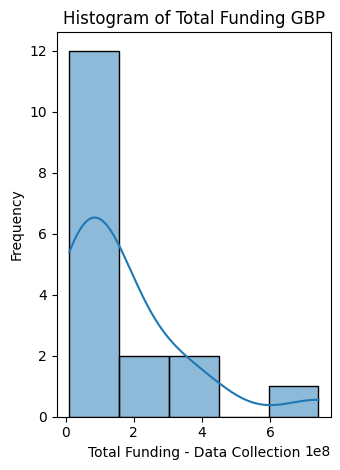

In [336]:
# Histogram for collected Total Funding
plt.subplot(1, 2, 1) 
sns.histplot(atf_spatial_analysis_df['total_funding_gbp'], bins=5, kde=True) 
plt.title('Histogram of Total Funding GBP')
plt.xlabel('Total Funding - Data Collection')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

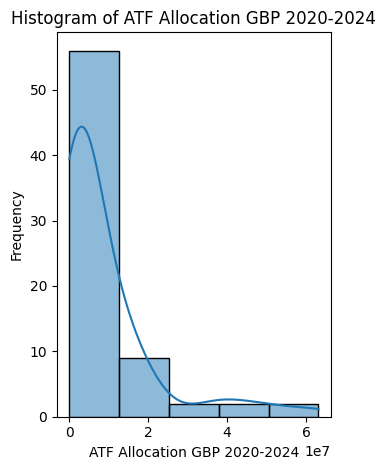

In [337]:
# Histogram for ATF Funding allocation
plt.subplot(1, 2, 1) 
sns.histplot(atf_spatial_analysis_df['atf_total_20_24'], bins=5, kde=True) 
plt.title('Histogram of ATF Allocation GBP 2020-2024')
plt.xlabel('ATF Allocation GBP 2020-2024')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [338]:
atf_spatial_analysis_df['total_funding_gbp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 73 entries, 0 to 72
Series name: total_funding_gbp
Non-Null Count  Dtype  
--------------  -----  
17 non-null     float64
dtypes: float64(1)
memory usage: 716.0 bytes


### Getting the funding values only to check the normality and correlation

In [339]:
tf_collected = atf_spatial_analysis_df['total_funding_gbp'].dropna()
tf_collected

4      82317186.0
7     112000000.0
9      40000000.0
12    354500000.0
15    741377560.0
22    130000000.0
27    251000000.0
30    250000000.0
35    115000000.0
40     10900000.0
43     73000000.0
44     42900000.0
51     31000000.0
55     45000000.0
65    101600000.0
67    411000000.0
72    100000000.0
Name: total_funding_gbp, dtype: float64

In [340]:
atf_total = atf_spatial_analysis_df['atf_total_20_24'].dropna()
atf_total

0      737857
1      634976
2      396208
3     5529110
4      361581
       ...   
68    2065720
69     689455
70    4345747
71    1759504
72    2231927
Name: atf_total_20_24, Length: 71, dtype: Int64

In [341]:
from scipy.stats import shapiro  # Importing Shapiro-Wilk test
from scipy.stats import kruskal  # Importing Kruskal-Wallis test
from scipy.stats import ttest_ind  # Importing independent samples t-test

### Normality Test for the funding columns

In [342]:
# Shapiro-Wilk test for total funding collected
stat_tf_collected, p_value_tf_collected = shapiro(tf_collected)
print("Shapiro-Wilk Test p-value for total_funding_gbp:", p_value_tf_collected)

# Shapiro-Wilk test for ATF funding total
stat_atf_total, p_value_atf_total = shapiro(atf_total)
print("Shapiro-Wilk Test p-value for atf_total_20_24:", p_value_atf_total)

Shapiro-Wilk Test p-value for total_funding_gbp: 0.0004840495713713424
Shapiro-Wilk Test p-value for atf_total_20_24: 1.2582430377514926e-11


Both p-values are less than 0.05, it rejects the null hypothesis and shows the data are not normally distributed. So we can proceed with a non-parametric test, Mann-Whitney U Test.

In [343]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
stat_mannwhitney, p_value_mannwhitney = mannwhitneyu(tf_collected, atf_total)
print("Mann-Whitney U Test statistic:", stat_mannwhitney)
print("p-value:", p_value_mannwhitney)

Mann-Whitney U Test statistic: 1173.0
p-value: 1.811424654663702e-09


In this case, since the p-value is relatively small (2.1.811424654663702e-09), we reject the null hypothesis and conclude that there is a significant difference between collected total funding and the total atf funding allocation from 2020 to 2024.

In [344]:
correlation_matrix = atf_spatial_analysis_df[['total_funding_gbp', 'atf_total_20_24']].corr()
correlation_coefficient = correlation_matrix.iloc[0, 1]

In [345]:
correlation_coefficient

np.float64(0.5573365337059524)

This indicates a moderate positive correlation.


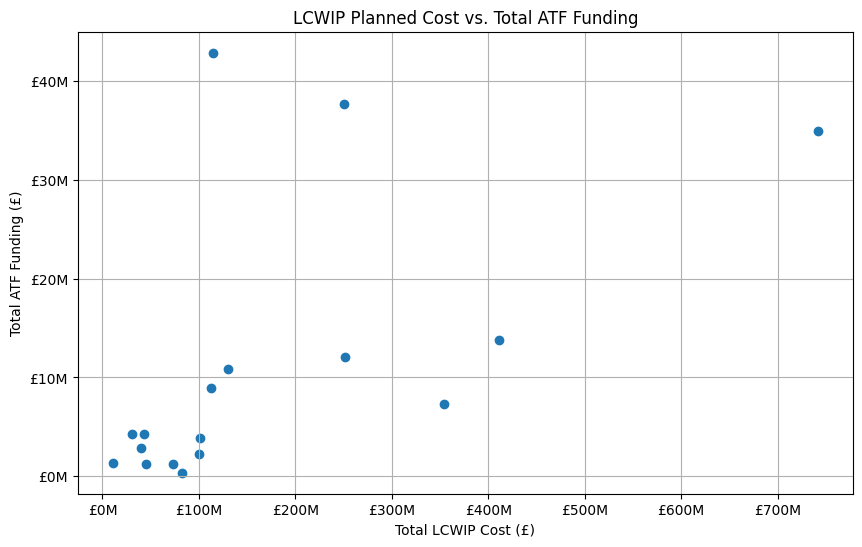

In [346]:
if correlation_coefficient > 0.7:
    print("This indicates a strong positive correlation.")
elif correlation_coefficient > 0.4:
    print("This indicates a moderate positive correlation.")
elif correlation_coefficient > 0:
    print("This indicates a weak positive correlation.")
elif correlation_coefficient < -0.7:
    print("This indicates a strong negative correlation.")
elif correlation_coefficient < -0.4:
    print("This indicates a moderate negative correlation.")
else:
    print("This indicates a weak or no linear correlation.")


#Visualize with a Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(atf_spatial_analysis_df['total_funding_gbp'], atf_spatial_analysis_df['atf_total_20_24'])

#Formatting for clarity
plt.title('LCWIP Planned Cost vs. Total ATF Funding')
plt.xlabel('Total LCWIP Cost (£)')
plt.ylabel('Total ATF Funding (£)')
plt.grid(True)

#axes in millions
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1000000:.0f}M'))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: f'£{y/1000000:.0f}M'))

plt.show()

## Finding relationship between the ATF funding and the proposed length of cycle network (data collected)

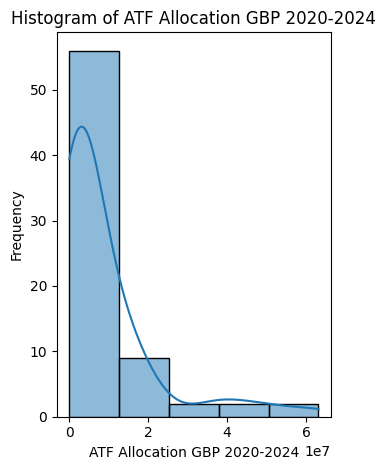

In [347]:
# Histogram for ATF Funding allocation
plt.subplot(1, 2, 1) 
sns.histplot(atf_spatial_analysis_df['atf_total_20_24'], bins=5, kde=True) 
plt.title('Histogram of ATF Allocation GBP 2020-2024')
plt.xlabel('ATF Allocation GBP 2020-2024')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

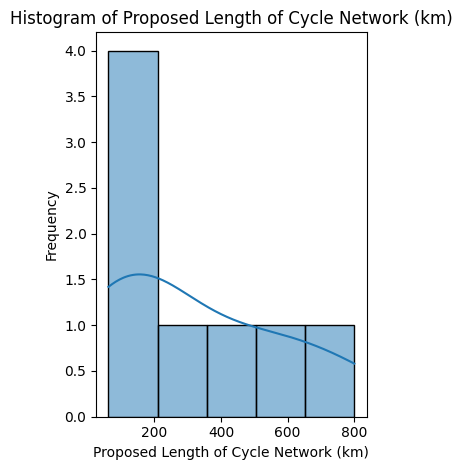

In [348]:
# Histogram for ATF Funding allocation
plt.subplot(1, 2, 1) 
sns.histplot(atf_spatial_analysis_df['total_length_km'], bins=5, kde=True) 
plt.title('Histogram of Proposed Length of Cycle Network (km)')
plt.xlabel('Proposed Length of Cycle Network (km)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [349]:
atf_spatial_analysis_df['total_length_km'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 73 entries, 0 to 72
Series name: total_length_km
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 716.0 bytes


### Getting the network length only for the normality test

In [350]:
network_length_km = atf_spatial_analysis_df['total_length_km'].dropna()

In [351]:
# Shapiro-Wilk test for proposed network length
stat_network_length, p_value_network_length = shapiro(network_length_km)
print("Shapiro-Wilk Test p-value for total_funding_gbp:", p_value_network_length)

Shapiro-Wilk Test p-value for total_funding_gbp: 0.16984452649416865


In [352]:
# Perform Mann-Whitney U test
stat_mannwhitney_km, p_value_mannwhitney_km = mannwhitneyu(network_length_km, atf_total)
print("Mann-Whitney U Test statistic:", stat_mannwhitney_km)
print("p-value:", p_value_mannwhitney_km)

Mann-Whitney U Test statistic: 0.0
p-value: 7.666129794756373e-11


In [353]:
correlation_matrix_km_atf = atf_spatial_analysis_df[['total_length_km', 'atf_total_20_24']].corr()
correlation_coefficient_km_atf = correlation_matrix_km_atf.iloc[0, 1]
print(correlation_coefficient_km_atf)

0.40242473976929705


This indicates a moderate positive correlation.


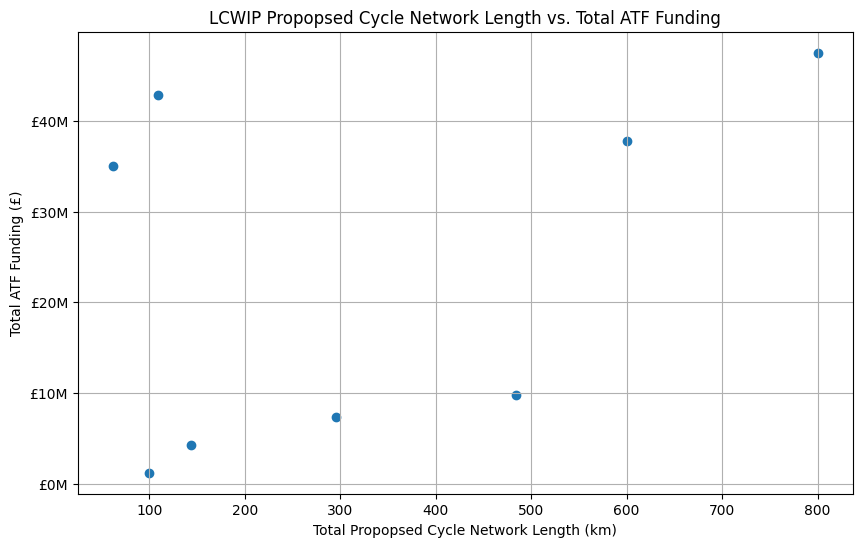

In [354]:
if correlation_coefficient_km_atf > 0.7:
    print("This indicates a strong positive correlation.")
elif correlation_coefficient_km_atf > 0.4:
    print("This indicates a moderate positive correlation.")
elif correlation_coefficient_km_atf > 0:
    print("This indicates a weak positive correlation.")
elif correlation_coefficient_km_atf < -0.7:
    print("This indicates a strong negative correlation.")
elif correlation_coefficient_km_atf < -0.4:
    print("This indicates a moderate negative correlation.")
else:
    print("This indicates a weak or no linear correlation.")


#Visualize with a Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(atf_spatial_analysis_df['total_length_km'], atf_spatial_analysis_df['atf_total_20_24'])

#Formatting for clarity
plt.title('LCWIP Propopsed Cycle Network Length vs. Total ATF Funding')
plt.xlabel('Total Propopsed Cycle Network Length (km)')
plt.ylabel('Total ATF Funding (£)')
plt.grid(True)

#y axis in millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: f'£{y/1000000:.0f}M'))

plt.show()